# Implementing a dahsboard as a webpage to visualize exchange rates time series

In [59]:
# the following package is needed to run the tests from your laptop,
# so that the tests can import the variables defined in this notebook.
#
# pip install ipynb

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Q1:  Fetch the last currency exchange rates from the ECB website
Find on the page 
<https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html>
the URL of the last 90 days ("XML (last 90 days only)"). Copy the URL to fetch its content in a variable.

The raw XML data for these 90 days should be stored in a variable ``xml_data`` as a string.


In [62]:
# A simple way to use the python standard library to fetch content from a URL is the following examle.
# It fethces the webpage at URL http://python.org/
import urllib.request
with urllib.request.urlopen('https://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist-90d.xml?9531d63dc137832dc128c3fcc9bc4f12') as response:
   xml_data  = response.read()

# Adapt the above to get the XML of the last 90 days of exchange rates from the ECB website.

xml_data



b'<?xml version="1.0" encoding="UTF-8"?><gesmes:Envelope xmlns:gesmes="http://www.gesmes.org/xml/2002-08-01" xmlns="http://www.ecb.int/vocabulary/2002-08-01/eurofxref"><gesmes:subject>Reference rates</gesmes:subject><gesmes:Sender><gesmes:name>European Central Bank</gesmes:name></gesmes:Sender><Cube><Cube time="2024-03-15"><Cube currency="USD" rate="1.0892"/><Cube currency="JPY" rate="162.03"/><Cube currency="BGN" rate="1.9558"/><Cube currency="CZK" rate="25.166"/><Cube currency="DKK" rate="7.4571"/><Cube currency="GBP" rate="0.8541"/><Cube currency="HUF" rate="393.2"/><Cube currency="PLN" rate="4.2953"/><Cube currency="RON" rate="4.9711"/><Cube currency="SEK" rate="11.2674"/><Cube currency="CHF" rate="0.9613"/><Cube currency="ISK" rate="148.9"/><Cube currency="NOK" rate="11.5205"/><Cube currency="TRY" rate="35.0917"/><Cube currency="AUD" rate="1.6579"/><Cube currency="BRL" rate="5.4461"/><Cube currency="CAD" rate="1.4731"/><Cube currency="CNY" rate="7.838"/><Cube currency="HKD" rate="

In [63]:
import xml.etree.ElementTree as ET

root = ET.fromstring(xml_data)

parent = root.find('{http://www.ecb.int/vocabulary/2002-08-01/eurofxref}Cube')
  
# Your goal is to populate the following DataFrame:
df = pd.DataFrame(columns=['USD', 'JPY', 'BGN', 'CZK', 'DKK', 'GBP', 'CHF'],
                  dtype=np.dtype('float64'))
df.index = df.index.astype(np.dtype('datetime64[ns]'))
"""
Check out
<https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html>
to add rows to a DataFrame.
"""

# your code here.
for cube_date in parent:
    date = cube_date.attrib['time']
    rates = {'USD': np.nan, 'JPY': np.nan, 'BGN': np.nan, 'CZK': np.nan, 'DKK': np.nan, 'GBP': np.nan, 'CHF': np.nan}
    
    for cube_currency in cube_date:
        currency = cube_currency.attrib['currency']
        rate = float(cube_currency.attrib['rate'])
        
        if currency in rates:
            rates[currency] = rate
    
    # Use .loc to assign the entire row of data
    df.loc[pd.to_datetime(date)] = rates

df.head()

,USD,JPY,BGN,CZK,DKK,GBP,CHF
2024-03-15,1.0892,162.03,1.9558,25.166,7.4571,0.85410,0.9613
2024-03-14,1.0925,161.70,1.9558,25.198,7.4568,0.85420,0.9616
2024-03-13,1.0939,161.83,1.9558,25.273,7.4573,0.85451,0.9599
2024-03-12,1.0916,161.39,1.9558,25.272,7.4571,0.85458,0.9588
2024-03-11,1.0926,160.43,1.9558,25.322,7.4552,0.85208,0.9594


# Q3: Filter the data-frame to only keep the currencies USD, GBP, CHF and the dates after February 1, 2024.

The filtered DataFrame should be in a variable ``df_filtered`` and contains three columns ``['USD', 'GBP', 'CHF']`` in that order. The date should be used as index for the rows.

For the filtered DataFrame, display the head and tail to display a few values.

In [64]:
df_filtered = df[['USD', 'GBP', 'CHF']][df.index >= '2024-02-01']


print("Head of the filtered DataFrame:")
print(df_filtered.head())

print("\nTail of the filtered DataFrame:")
print(df_filtered.tail())

Head of the filtered DataFrame:
               USD      GBP     CHF
2024-03-15  1.0892  0.85410  0.9613
2024-03-14  1.0925  0.85420  0.9616
2024-03-13  1.0939  0.85451  0.9599
2024-03-12  1.0916  0.85458  0.9588
2024-03-11  1.0926  0.85208  0.9594

Tail of the filtered DataFrame:
               USD      GBP     CHF
2024-02-07  1.0776  0.85305  0.9393
2024-02-06  1.0743  0.85460  0.9366
2024-02-05  1.0746  0.85595  0.9347
2024-02-02  1.0883  0.85263  0.9315
2024-02-01  1.0814  0.85353  0.9336


In [65]:
print(df.index)
num_columns = len(df_filtered.columns)
num_columns

DatetimeIndex(['2024-03-15', '2024-03-14', '2024-03-13', '2024-03-12',
               '2024-03-11', '2024-03-08', '2024-03-07', '2024-03-06',
               '2024-03-05', '2024-03-04', '2024-03-01', '2024-02-29',
               '2024-02-28', '2024-02-27', '2024-02-26', '2024-02-23',
               '2024-02-22', '2024-02-21', '2024-02-20', '2024-02-19',
               '2024-02-16', '2024-02-15', '2024-02-14', '2024-02-13',
               '2024-02-12', '2024-02-09', '2024-02-08', '2024-02-07',
               '2024-02-06', '2024-02-05', '2024-02-02', '2024-02-01',
               '2024-01-31', '2024-01-30', '2024-01-29', '2024-01-26',
               '2024-01-25', '2024-01-24', '2024-01-23', '2024-01-22',
               '2024-01-19', '2024-01-18', '2024-01-17', '2024-01-16',
               '2024-01-15', '2024-01-12', '2024-01-11', '2024-01-10',
               '2024-01-09', '2024-01-08', '2024-01-05', '2024-01-04',
               '2024-01-03', '2024-01-02', '2023-12-29', '2023-12-28',
      

3

# Q4: Using the filtered DataFrame, display for each currency and for each of the two months (Feb and March) the following descriptive statistics for the exchange rate: 

- mean of the rate over each month (February, March)  and each of the three currencies (CHF, GBP, USD)
- max of the rate over each month (February, March)  and each of the three currencies (CHF, GBP, USD)
- min of the rate over each month (February, March)  and each of the three currencies (CHF, GBP, USD)
- standard deviation of the rate over each month (February, March)  and each of the three currencies (CHF, GBP, USD)

The resulting dataframe should be stored in variable ``df_aggregated``.

You may use groupby or pivot tables.

You may extract the month from a pandas Series that contain datatimes using <https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html> with ``%B`` for a month, and ``%Y`` for year. Another possibility is <https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html> 


## The resulting dataframe of the result should have
- one level for the rows (currency),
- two levels for the columns:
    1. first level: month, with two values "2024-February" and "2024-March"
    2. second level: aggregation method used among mean, max, min, std).

In [80]:
df_temporary = df_filtered.copy()

# Extract Month-Year as a string for easier grouping
df_temporary['Month-Year'] = df_temporary.index.strftime('%Y-%B')

# Preparing a sorted list of months to ensure correct order
months_sorted = ['2024-February', '2024-March']

# Initialize an empty DataFrame for the aggregated results with sorted columns
stats_order = ['max', 'mean', 'min', 'std']  # Correct order of statistics
columns = pd.MultiIndex.from_product([months_sorted, stats_order], names=['Month', 'Statistic'])
df_aggregated = pd.DataFrame(columns=columns, index=['CHF', 'GBP', 'USD']).sort_index()

# Aggregate and fill the DataFrame
for currency in df_aggregated.index:
    for month in months_sorted:
        # Select data for the current month and currency
        temp_df = df_temporary[df_temporary['Month-Year'] == month]

        # Compute statistics and assign them to the df_aggregated
        for stat in stats_order:
            if stat == 'mean':
                value = temp_df[currency].mean()
            elif stat == 'max':
                value = temp_df[currency].max()
            elif stat == 'min':
                value = temp_df[currency].min()
            elif stat == 'std':
                value = temp_df[currency].std()
            
            df_aggregated.loc[currency, (month, stat)] = value

# Ensure the MultiIndex is sorted (if necessary)
df_aggregated = df_aggregated.sort_index(axis=1)

print(df_aggregated)

Month     2024-February                              2024-March            \
Statistic           max      mean      min       std        max      mean   
CHF              0.9546  0.946219   0.9315  0.007437     0.9619    0.9599   
GBP              0.8566  0.854662  0.85098  0.001592    0.85588  0.854338   
USD              1.0883  1.079471   1.0713  0.004401     1.0939  1.089155   

Month                         
Statistic      min       std  
CHF         0.9577  0.001432  
GBP        0.85168  0.001362  
USD         1.0813  0.004143  


# Q5: Figure A: In the same plot, using either matplotlib or pandas or seaborn,  draw lineplots of the daily exchange rates with different colors for USD, GBP, CHF and legend ``1 EUR in USD``, ``1 EUR in GBP`` and ``1 EURO in CHF``.

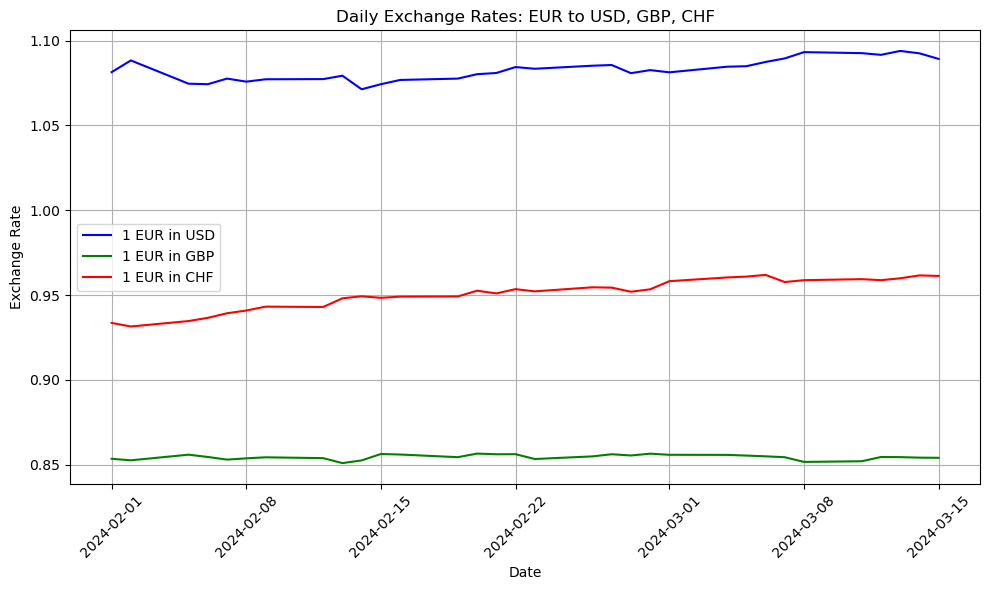

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  

plt.plot(df_filtered.index, df_filtered['USD'], label='1 EUR in USD', color='blue')
plt.plot(df_filtered.index, df_filtered['GBP'], label='1 EUR in GBP', color='green')
plt.plot(df_filtered.index, df_filtered['CHF'], label='1 EUR in CHF', color='red')


plt.title('Daily Exchange Rates: EUR to USD, GBP, CHF')  
plt.xlabel('Date')  
plt.ylabel('Exchange Rate') 
plt.xticks(rotation=45)  
plt.grid(True)  


plt.legend()


plt.tight_layout()  
plt.show()

# Q6: Figure B: In another plot, draw a similar lineplots with USD as the baseline, with legend ``1 USD in EUR``, ``1 USD in GBP`` and ``1 USD in CHF``.

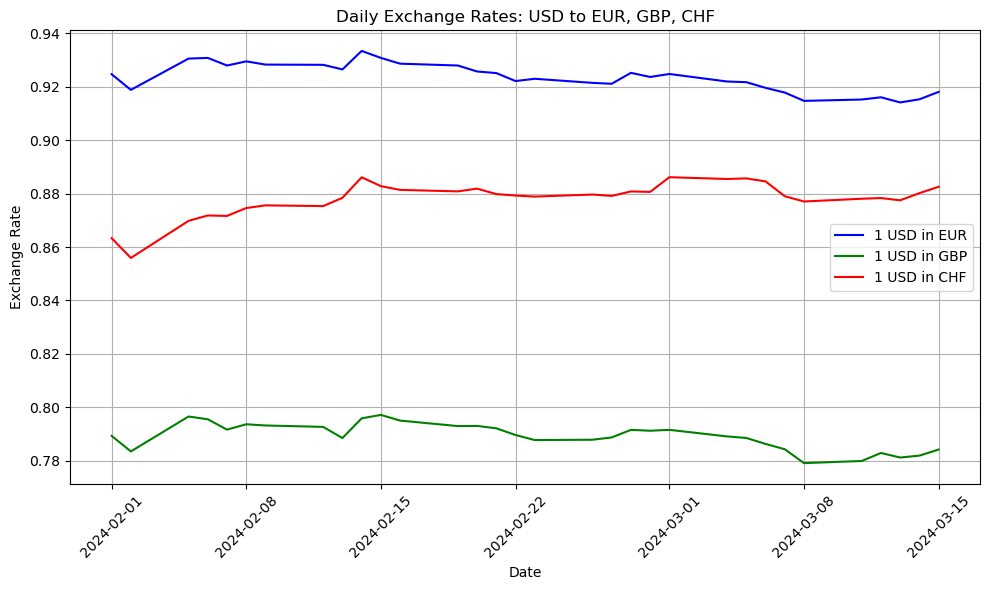

In [82]:
df_usd_baseline = df_filtered.copy()
df_usd_baseline['EUR'] = 1 / df_usd_baseline['USD']  # 1 USD in EUR
df_usd_baseline['GBP'] = df_usd_baseline['GBP'] / df_usd_baseline['USD']  # 1 USD in GBP
df_usd_baseline['CHF'] = df_usd_baseline['CHF'] / df_usd_baseline['USD']  # 1 USD in CHF


plt.figure(figsize=(10, 6)) 


plt.plot(df_usd_baseline.index, df_usd_baseline['EUR'], label='1 USD in EUR', color='blue')
plt.plot(df_usd_baseline.index, df_usd_baseline['GBP'], label='1 USD in GBP', color='green')
plt.plot(df_usd_baseline.index, df_usd_baseline['CHF'], label='1 USD in CHF', color='red')


plt.title('Daily Exchange Rates: USD to EUR, GBP, CHF') 
plt.xlabel('Date') 
plt.ylabel('Exchange Rate')
plt.xticks(rotation=45) 
plt.grid(True) 


plt.legend()

plt.tight_layout() 
plt.show()

# Q7: Figure C: create two subplots side-by-side where the left subplot shows the data from Figure 1 and the right subplot shows the data from Figure 2.

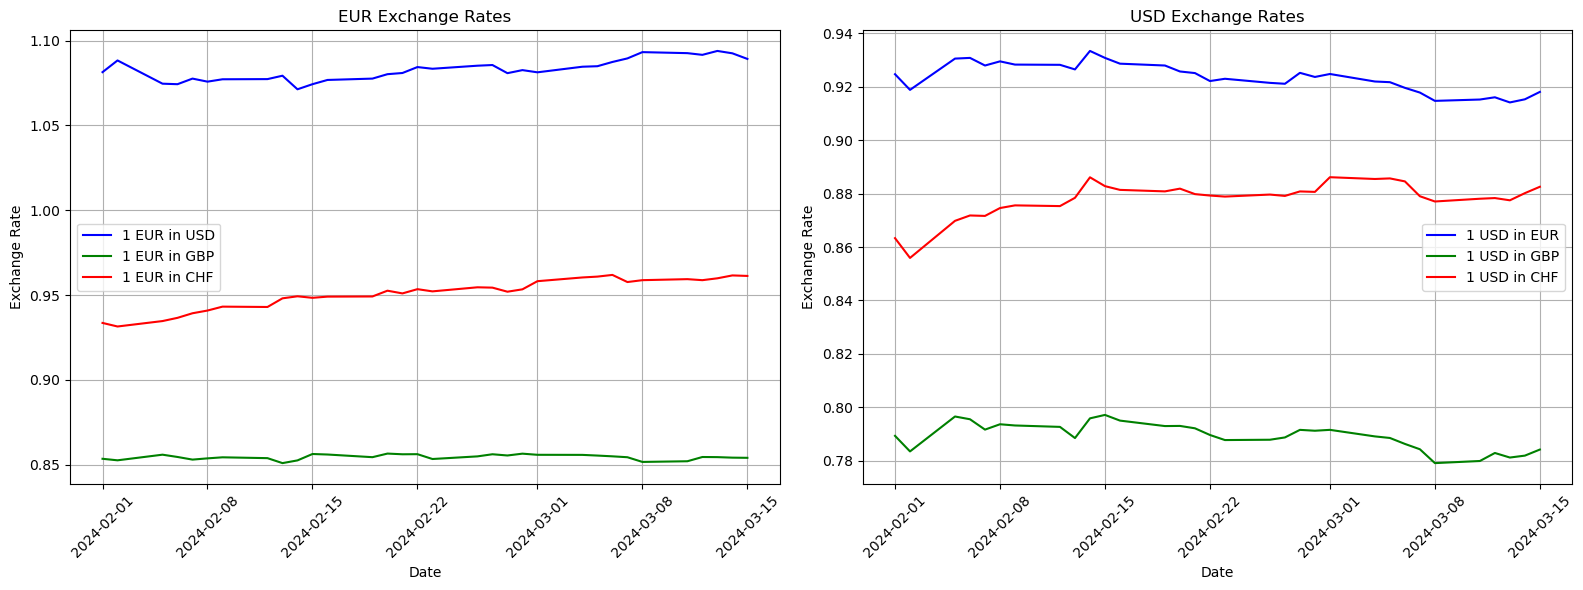

In [83]:
import matplotlib.pyplot as plt


df_usd_baseline = df_filtered.copy()
df_usd_baseline['EUR'] = 1 / df_usd_baseline['USD']  # 1 USD in EUR
df_usd_baseline['GBP'] = df_usd_baseline['GBP'] / df_usd_baseline['USD']  # 1 USD in GBP
df_usd_baseline['CHF'] = df_usd_baseline['CHF'] / df_usd_baseline['USD']  # 1 USD in CHF


fig, ax = plt.subplots(1, 2, figsize=(16, 6))


ax[0].plot(df_filtered.index, df_filtered['USD'], label='1 EUR in USD', color='blue')
ax[0].plot(df_filtered.index, df_filtered['GBP'], label='1 EUR in GBP', color='green')
ax[0].plot(df_filtered.index, df_filtered['CHF'], label='1 EUR in CHF', color='red')
ax[0].set_title('EUR Exchange Rates')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Exchange Rate')
ax[0].legend()
ax[0].grid(True)
ax[0].tick_params(axis='x', rotation=45)


ax[1].plot(df_usd_baseline.index, df_usd_baseline['EUR'], label='1 USD in EUR', color='blue')
ax[1].plot(df_usd_baseline.index, df_usd_baseline['GBP'], label='1 USD in GBP', color='green')
ax[1].plot(df_usd_baseline.index, df_usd_baseline['CHF'], label='1 USD in CHF', color='red')
ax[1].set_title('USD Exchange Rates')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Exchange Rate')
ax[1].legend()
ax[1].grid(True)
ax[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

In [3]:
jupyter nbconvert rates.ipynb --to html

SyntaxError: invalid syntax (1503241048.py, line 1)

In [2]:
import nbconvert